In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
def Scale_image(img, template, min_scale=0.5, max_scale=1):
    # img, template: Ảnh đầu vào đã được chuyển sang ảnh xám.
    # Hàm trả về giá trị scale tốt nhất + tọa độ cho việc match template.
    scale = 1
    best_scale = 1
    best_val = 0
    best_loc = (0, 0)
    best_loc_right = (0, 0)
    img_edges = cv2.Canny(img, 50, 150)
    while scale >= min_scale and scale <= max_scale:
        template_resized = cv2.resize(template, (int(template.shape[1]*scale), int(template.shape[0]*scale)))
        w, h = template_resized.shape[::-1]
        template_edges = cv2.Canny(template_resized, 50, 150)
        res = cv2.matchTemplate(img_edges, template_edges, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        if max_val > best_val:
            best_val = max_val
            best_loc = max_loc
            best_scale = scale
            best_loc_right = (best_loc[0] + w, best_loc[1] + h)
        scale -= 0.01
    
    return best_scale, best_loc, best_loc_right

In [9]:
def find_template(foder_path):
    # Đọc ảnh
    image = cv2.imread(foder_path + '/check.jpg')
    # Đọc tất cả các ảnh có đuôi .png có trong thư mục
    templates = []
    for file in os.listdir(foder_path):
        if file.endswith('.png'):
            templates.append(cv2.imread(foder_path + '/' + file, 0))
    # Chuyển ảnh sang ảnh xám
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Tìm template
    for template in templates:
        scale, loc, loc_right = Scale_image(image_gray, template, 0.5, 1)
        # Vẽ hình chữ nhật bao quanh template
        cv2.rectangle(image, loc, loc_right, (0, 0, 0), 4)
        # Thêm thông tin scale vào trên template
        cv2.putText(image, 'Scale: ' + str(scale), loc, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    # Hiển thị ảnh
    plt.imshow(image)

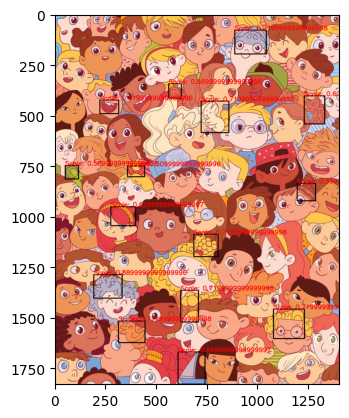

In [10]:
find_template('image1')

In [ ]:
find_template('image2')

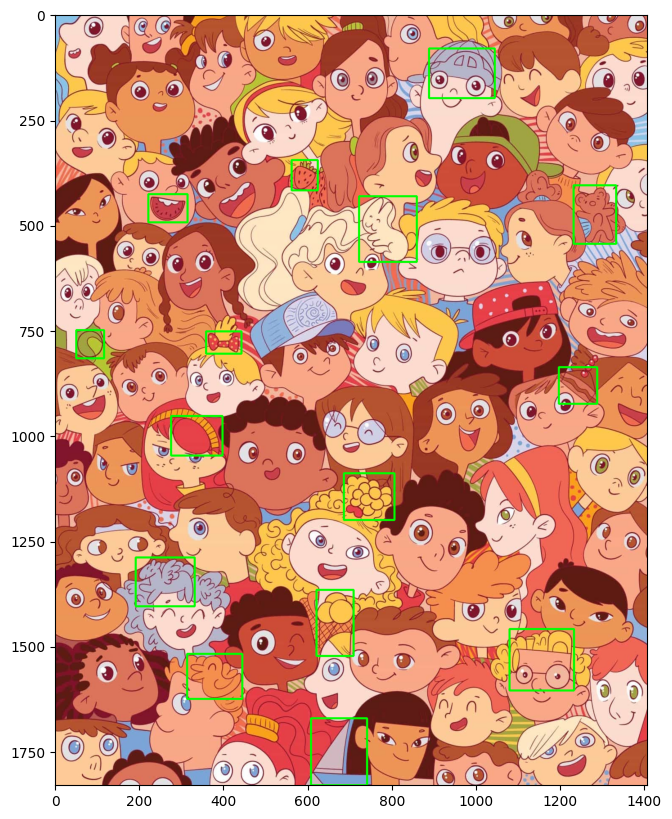

In [7]:
img = cv2.imread('image1/check.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
for i in range(1, 16):
    template = cv2.imread(f'image1/image_{i}.png', 0)
    scale, top_left, bottom_right = Scale_image(img_gray, template)
    cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
plt.figure(figsize=(30, 10))
plt.imshow(img)

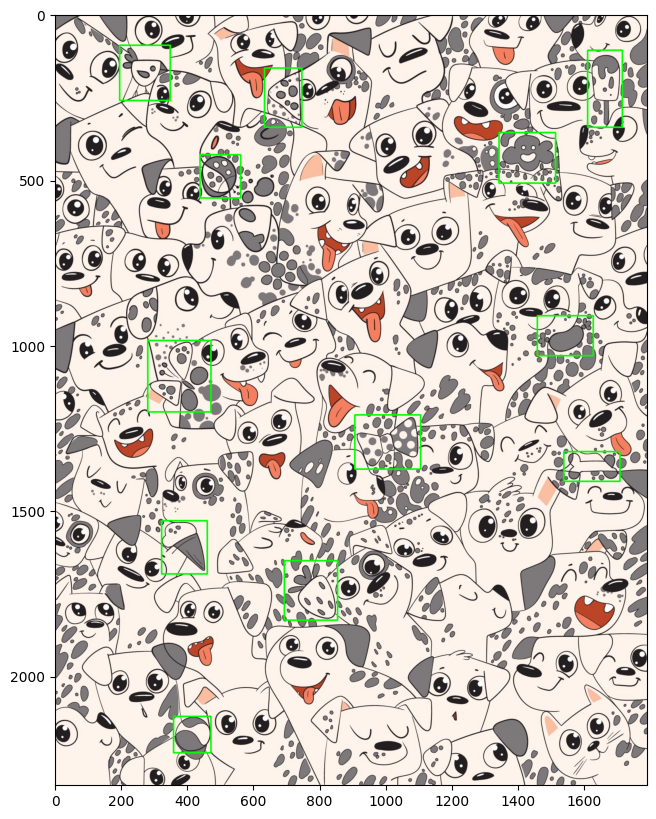

In [10]:
img = cv2.imread('image2/check.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
for i in range(1, 13):
    template = cv2.imread(f'image2/image{i}.png', 0)
    scale, top_left, bottom_right = Scale_image(img_gray, template)
    cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
plt.figure(figsize=(30, 10))
plt.imshow(img)